<h1> 4. Metode odabira značajki </h1>

U ovoj datoteci probat ćemo dobiti bolji uvid u važnosti značajki pripremljenog skupa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
## BRISE UPOZORENJA
import warnings
warnings.filterwarnings('ignore')

In [3]:
## UČITAVANJE TRAIN I TEST SKUPA

X_train = pd.read_hdf('X_train2.h5' , key = 'X_train')
X_test = pd.read_hdf('X_test2.h5', key = 'X_test')
y_train = X_train['PRIJEVREMENI_RASKID'].ravel()
X_train.drop(['PRIJEVREMENI_RASKID'], axis = 1, inplace = True)

## to je normalizirani skup, spreman za treniranje

<h3> Univarijatni odabir </h3>

Makroekonomski indikatori su znacajke koje pocinju sa 'ind'. Imena tih značajki su izmijenjena u bilježnici "data_preparation". 
Prava imena su:
1. ind1-poc = GDP per capita (in EUR) 
2. ind2-poc = GDP - year-on-year rate of growth (in %, constant prices) 
3. ind3-poc = Average CPI year-on-year inflation rate 
4. ind4-poc = Current account balance (as of % GDP) 
5. ind5-poc = Exports of goods and services (as of % GDP)
6. ind6-poc = Imports of goods and services (as of % GDP) 
7. ind7-poc = External debt (as of % GDP) 
8. ind8-poc = Average exchange rate (HRK : 1 EUR)
9. ind9-poc = Average exchange rate (HRK : 1 USD)
10. ind10-poc = Consolidated general government net lending (+)/borrowing (-) (as % of GDP)
11. ind11-poc = General government debt (as % of GDP)
12. ind12-poc = Employment rate (ILO, persons above 15 years of age)

[0.11350608 0.26281598 0.0498457  0.11480084 0.12933166 0.11437291
 0.00519924 0.00727466 0.00664969 0.0011277  0.00386071 0.00294577
 0.00388926 0.01318263 0.00384136 0.00654553 0.00618292 0.00546128
 0.01943269 0.0199576  0.02618374 0.05028783 0.01531903 0.01798521]


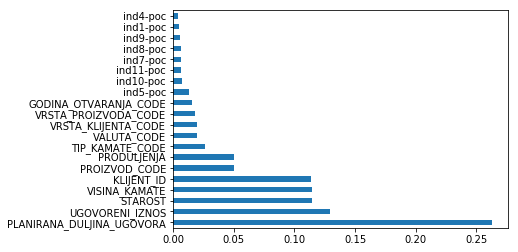

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = X_train
y = y_train  #target column i.e price range


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[0.11333874 0.26008279 0.0486498  0.11423738 0.12912569 0.1129839
 0.00268493 0.00399287 0.00781983 0.00184369 0.00923496 0.0036097
 0.00855493 0.00679737 0.00665576 0.00398603 0.00360418 0.01011679
 0.0186797  0.02393693 0.02461062 0.06528863 0.00325055 0.01691423]


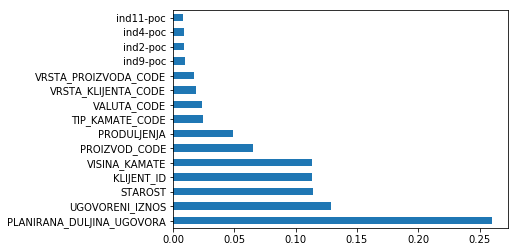

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = X_train
y = y_train  #target column i.e price range


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [6]:
!pip install xgboost

[5.7245581e-03 8.1000350e-02 4.2669930e-02 0.0000000e+00 3.4551546e-02
 0.0000000e+00 6.8781443e-02 1.4838513e-02 9.0715222e-02 1.7552849e-05
 9.0997294e-02 1.1354234e-02 1.0709512e-01 3.0503251e-02 0.0000000e+00
 4.7605205e-03 0.0000000e+00 2.2624081e-02 1.4605451e-03 5.3390609e-03
 5.5859730e-02 1.3700770e-01 1.4375409e-01 5.0945286e-02]


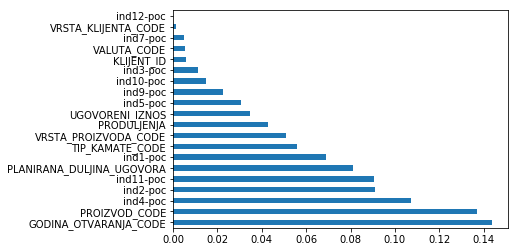

In [7]:
import xgboost as xgb

X = X_train
y = y_train  #target column i.e price range

import matplotlib.pyplot as plt
model = xgb.XGBClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[5.7245581e-03 8.1000350e-02 4.2669930e-02 0.0000000e+00 3.4551546e-02
 0.0000000e+00 6.8781443e-02 1.4838513e-02 9.0715222e-02 1.7552849e-05
 9.0997294e-02 1.1354234e-02 1.0709512e-01 3.0503251e-02 0.0000000e+00
 4.7605205e-03 0.0000000e+00 2.2624081e-02 1.4605451e-03 5.3390609e-03
 5.5859730e-02 1.3700770e-01 1.4375409e-01 5.0945286e-02]


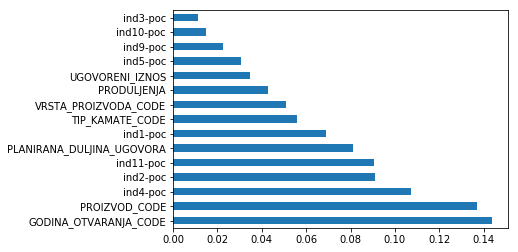

In [8]:
import xgboost as xgb

X = X_train
y = y_train  #target column i.e price range

import matplotlib.pyplot as plt
model = xgb.XGBClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [9]:
ft_num = X_train.shape[1]
print('Broj značajki u originalnom skupu:', ft_num)

Broj značajki u originalnom skupu: 24


In [10]:
X.columns

Index(['KLIJENT_ID', 'PLANIRANA_DULJINA_UGOVORA', 'PRODULJENJA', 'STAROST',
       'UGOVORENI_IZNOS', 'VISINA_KAMATE', 'ind1-poc', 'ind10-poc',
       'ind11-poc', 'ind12-poc', 'ind2-poc', 'ind3-poc', 'ind4-poc',
       'ind5-poc', 'ind6-poc', 'ind7-poc', 'ind8-poc', 'ind9-poc',
       'VRSTA_KLIJENTA_CODE', 'VALUTA_CODE', 'TIP_KAMATE_CODE',
       'PROIZVOD_CODE', 'GODINA_OTVARANJA_CODE', 'VRSTA_PROIZVODA_CODE'],
      dtype='object')

Odabrane su tri različite varijante odabira značajki na kojima ćemo trenirati model. 

In [11]:
features1 = ['ind2-poc', 'PROIZVOD_CODE', 'GODINA_OTVARANJA_CODE', 'ind4-poc', 'ind11-poc', 'ind9-poc', 
             'PLANIRANA_DULJINA_UGOVORA', 'VRSTA_PROIZVODA_CODE', 'ind1-poc', 'TIP_KAMATE_CODE', 'UGOVORENI_IZNOS',
             'VALUTA_CODE', 'PRODULJENJA', 'ind10-poc', 'KLIJENT_ID', 'ind12-poc', 'ind8-poc', 'ind6-poc', 
             'VRSTA_KLIJENTA_CODE', 'STAROST']

features2 = ['PLANIRANA_DULJINA_UGOVORA', 'PRODULJENJA', 'VISINA_KAMATE', 'STAROST',
       'KLIJENT_ID', 'UGOVORENI_IZNOS', 'VALUTA_CODE', 'PROIZVOD_CODE',
       'VRSTA_PROIZVODA_CODE', 'VRSTA_KLIJENTA_CODE', 'TIP_KAMATE_CODE',
       'ind8-poc', 'ind3-poc', 'ind4-poc']

features3 = ['GODINA_OTVARANJA_CODE', 'PROIZVOD_CODE', 'ind4-poc', 'ind2-poc', 'ind11-poc', 'PLANIRANA_DULJINA_UGOVORA',
            'ind1-poc', 'TIP_KAMATE_CODE', 'VRSTA_PROIZVODA_CODE', 'PRODULJENJA', 'UGOVORENI_IZNOS', 'ind5-poc', 'ind9-poc',
            'ind10-poc', 'ind3-poc', 'KLIJENT_ID', 'VALUTA_CODE', 'ind7-poc', 'VRSTA_KLIJENTA_CODE']

<h3> Korelacija značajki </h3>

U ovom dijelu promatramo kako su značajke koreliranje s ciljnom značajkom.

In [12]:
X = X_train.copy()
X['PRIJEVREMENI_RASKID'] = y_train

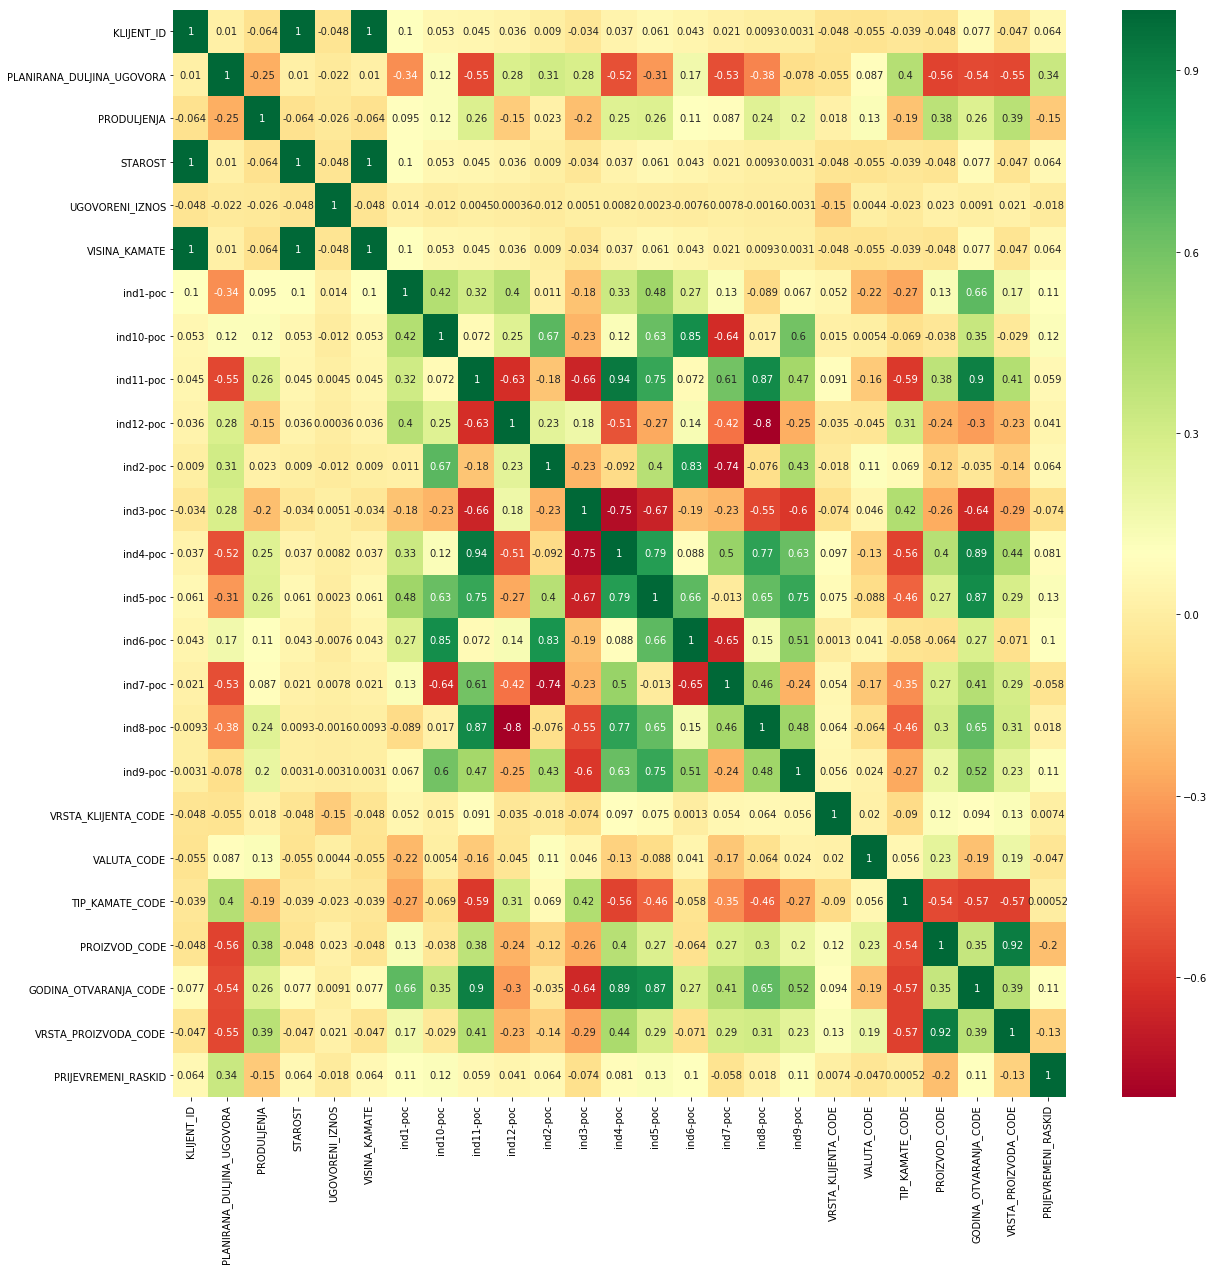

In [13]:
import seaborn as sns
#get correlations of each features in dataset
data = X
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<h3> Ispis skupa za učenje i testiranje s odabranim značajkama </h3>

In [14]:
X_train_out1 = X_train[features1]
X_test_out1 = X_test[features1]

X_train_out2 = X_train[features2]
X_test_out2 = X_test[features2]

X_train_out3 = X_train[features3]
X_test_out3 = X_test[features3]

X_train_out1['PRIJEVREMENI_RASKID'] = y_train
X_train_out2['PRIJEVREMENI_RASKID'] = y_train
X_train_out3['PRIJEVREMENI_RASKID'] = y_train

In [15]:
X_train_out1.to_hdf('X_train_ft1.h5', key= 'X_train_ft1')
X_train_out2.to_hdf('X_train_ft2.h5', key= 'X_train_ft2')
X_train_out3.to_hdf('X_train_ft3.h5', key= 'X_train_ft3')

In [16]:
X_test_out1.to_hdf('X_test_ft1.h5', key= 'X_test_ft1')
X_test_out2.to_hdf('X_test_ft2.h5', key= 'X_test_ft2')
X_test_out3.to_hdf('X_test_ft3.h5', key= 'X_test_ft3')